In [ ]:
import pickle

# Heart Disease Prediction

https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset/data

In [ ]:
#loading dataset
import pandas as pd
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.ensemble import RandomForestClassifier


In [ ]:
data = pd.read_csv('/content/heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
y = data["target"]
X = data.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
m = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[ 88  10]
 [  3 104]]


Accuracy of Random Forest: 93.65853658536587 

              precision    recall  f1-score   support

           0       0.97      0.90      0.93        98
           1       0.91      0.97      0.94       107

    accuracy                           0.94       205
   macro avg       0.94      0.93      0.94       205
weighted avg       0.94      0.94      0.94       205



In [ ]:
print(rf.predict([[50,	0	,0,	110,	254,	0	,0	,159,	0	,0.0,	2	,0,	2]]))

[0]


In [ ]:
heart_filename = 'heart_model.sav'
pickle.dump(rf, open(heart_filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(heart_filename, 'rb'))
result = loaded_model.predict([[50,	0	,0,	110,	254,	0	,0	,159,	0	,0.0,	2	,0,	2]])
print(result)

[1]


# Diabetes Prediction

https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset/data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew

from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error

In [ ]:
data = pd.read_csv("/content/diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_b

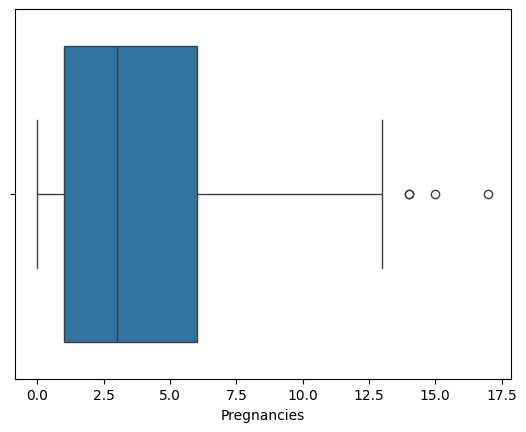

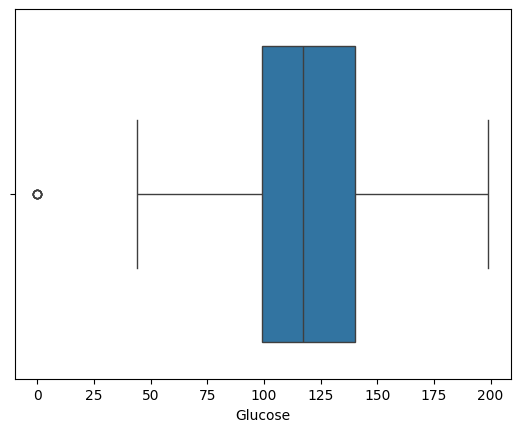

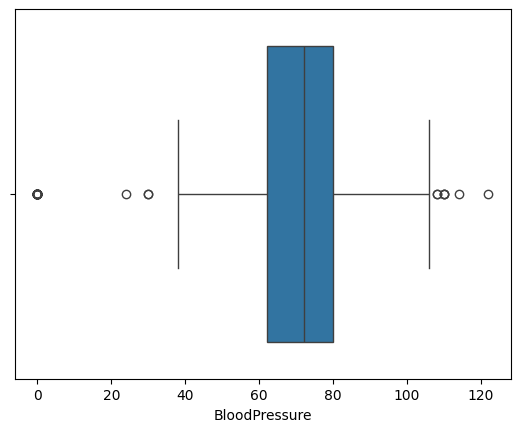

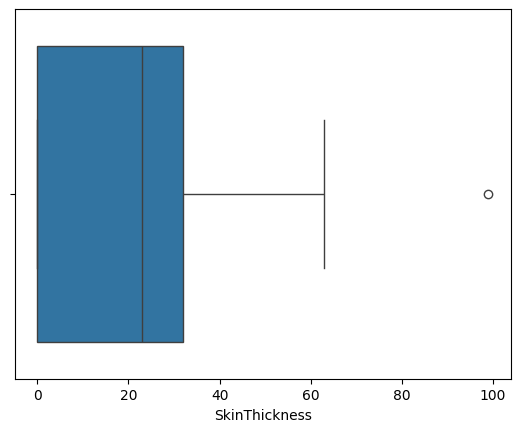

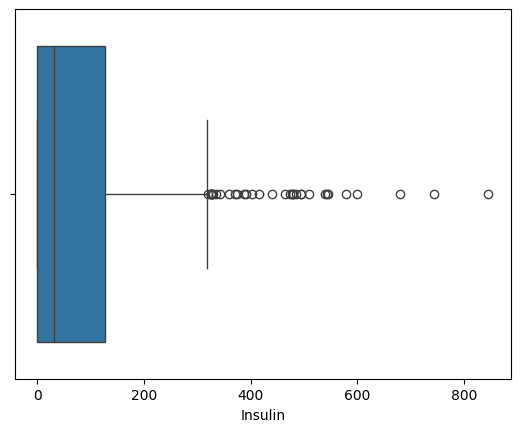

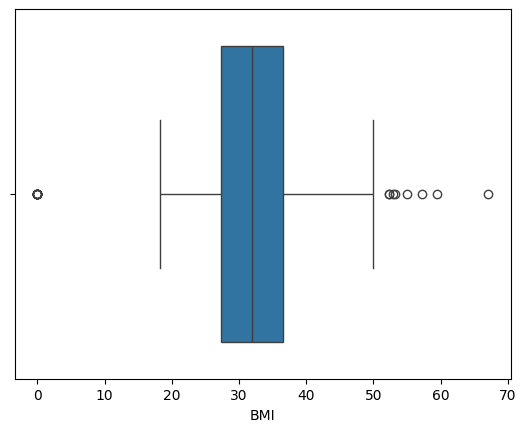

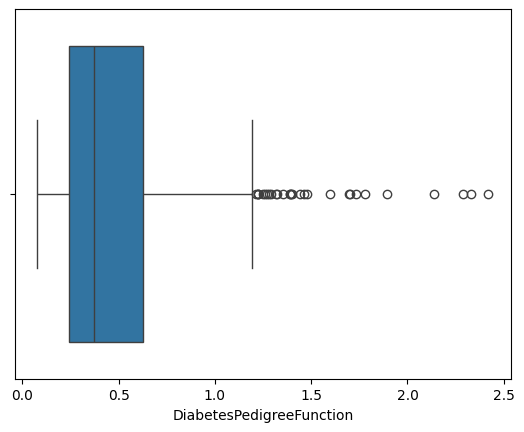

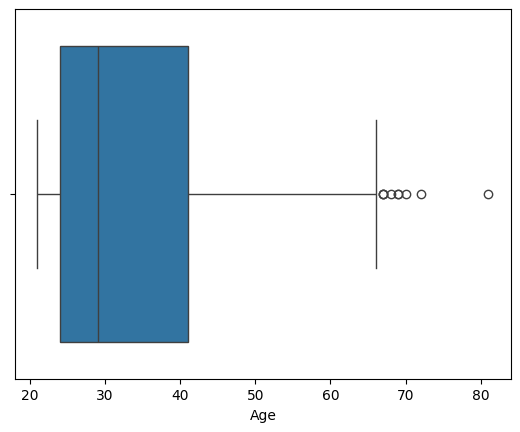

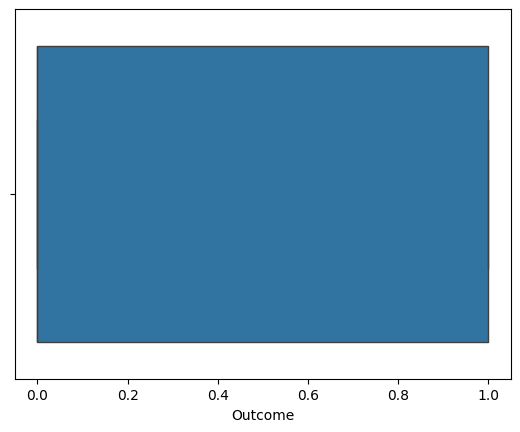

In [ ]:
for c in data.columns:
    plt.figure()
    sns.boxplot(x = c, data = data, orient = "v")

In [ ]:
descirbe = data.describe()

In [ ]:
def cleanColumn(data,columns, thr = 2):
    column_desc = descirbe[columns]

    q3 = column_desc[6]
    q1 = column_desc[4]
    IQR = q3 - q1

    top_limit_clm = q3 + thr * IQR
    bottom_limit_clm = q1 - thr * IQR

    filter_clm_bottom = bottom_limit_clm < data[columns]
    filter_clm_top = data[columns] < top_limit_clm

    filters = filter_clm_bottom & filter_clm_top

    data = data[filters]

    print("{} of dataset after column {}".format(data.shape, columns))

    return data

In [ ]:
for i in data.columns:
    data = cleanColumn(data,i)

(767, 9) of dataset after column Pregnancies
(762, 9) of dataset after column Glucose
(725, 9) of dataset after column BloodPressure
(724, 9) of dataset after column SkinThickness
(702, 9) of dataset after column Insulin
(695, 9) of dataset after column BMI
(684, 9) of dataset after column DiabetesPedigreeFunction
(683, 9) of dataset after column Age
(683, 9) of dataset after column Outcome


In [ ]:
print("New data shape: ", data.shape)

New data shape:  (683, 9)


In [ ]:
skewed_feats = data.apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
skewness = pd.DataFrame(skewed_feats, columns = ["Skewed"])
skewness

,Skewed
Insulin,1.148896
DiabetesPedigreeFunction,1.119475
Age,1.055218
Pregnancies,0.861260
Outcome,0.697809
Glucose,0.560719
BMI,0.370465
BloodPressure,0.129308
SkinThickness,-0.084269


In [ ]:
x = data.drop(["Outcome"], axis = 1)
y = data["Outcome"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [ ]:
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (512, 8)
x_test shape:  (171, 8)
y_train shape:  (512,)
y_test shape:  (171,)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)



In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(512, 8)
(171, 8)
(512,)
(171,)


In [ ]:
m = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=50, random_state=12,max_depth=10)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[98 14]
 [20 39]]


Accuracy of Random Forest: 80.11695906432749 

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       112
           1       0.74      0.66      0.70        59

    accuracy                           0.80       171
   macro avg       0.78      0.77      0.77       171
weighted avg       0.80      0.80      0.80       171



In [ ]:
test_data = [6,	148,	72,	35	,0	,33.6,	0.627,	50]
scaledData = scaler.transform([test_data])
print(rf.predict(scaledData))

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
disbetes_scaler_filename = 'disbetes_scaler.pkl'
pickle.dump(scaler, open(disbetes_scaler_filename, 'wb'))

In [ ]:
loaded_scaler = pickle.load(open(disbetes_scaler_filename, 'rb'))

In [ ]:
disbetes_model_filename = 'disbetes_model.sav'
pickle.dump(rf, open(disbetes_model_filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(disbetes_model_filename, 'rb'))
test_data = [1,	93,	70,	31	,0,	30.4,	0.315,	23]
scaledData = loaded_scaler.transform([test_data])
print(rf.predict(scaledData))

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Chronic Kidney Disease

https://www.kaggle.com/datasets/mansoordaku/ckdisease

In [ ]:
df= pd.read_csv('/content/kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.shape

(400, 26)

In [ ]:
df.drop('id', axis = 1, inplace = True)

In [ ]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [ ]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [ ]:
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [ ]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [ ]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



In [ ]:
df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [ ]:
df['class'] = df['class'].map({'ckd': 1, 'not ckd': 0})
df['class'] = pd.to_numeric(df['class'], errors='coerce')

In [ ]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

class has [1 0] values



In [ ]:
def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample

def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [ ]:
for col in num_cols:
    random_value_imputation(col)

In [ ]:
df[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [ ]:
random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)

In [ ]:
df[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
row_no = 100
print(df.iloc[row_no])
list(df.iloc[row_no])

age                          34.000
blood_pressure               70.000
specific_gravity              1.015
albumin                       4.000
sugar                         0.000
red_blood_cells               0.000
pus_cell                      0.000
pus_cell_clumps               0.000
bacteria                      0.000
blood_glucose_random        153.000
blood_urea                   22.000
serum_creatinine              0.900
sodium                      133.000
potassium                     3.800
haemoglobin                  12.200
packed_cell_volume           42.000
white_blood_cell_count     6600.000
red_blood_cell_count          5.000
hypertension                  0.000
diabetes_mellitus             0.000
coronary_artery_disease       0.000
appetite                      0.000
peda_edema                    1.000
aanemia                       0.000
class                         1.000
Name: 100, dtype: float64


[34.0,
 70.0,
 1.015,
 4.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 153.0,
 22.0,
 0.9,
 133.0,
 3.8,
 12.2,
 42.0,
 6600.0,
 5.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0]

In [ ]:
X = df.drop(["class"], axis = 1)
y = df["class"]

In [ ]:
X

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,15.4,44.0,7800.0,5.2,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,93.0,...,11.3,38.0,6000.0,4.5,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,9.6,31.0,7500.0,5.1,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11.2,32.0,6700.0,3.9,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,11.6,35.0,7300.0,4.6,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,15.7,47.0,6700.0,4.9,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,16.5,54.0,7800.0,6.2,0,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,15.8,49.0,6600.0,5.4,0,0,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,14.2,51.0,7200.0,5.9,0,0,0,0,0,0


In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: class, Length: 400, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [ ]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(learning_rate = 1)
lgbm.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of lgbm classifier

lgbm_acc = accuracy_score(y_test, lgbm.predict(X_test))

print(f"Training Accuracy of LGBM Classifier is {accuracy_score(y_train, lgbm.predict(X_train))}")
print(f"Test Accuracy of LGBM Classifier is {lgbm_acc} \n")

print(f"{confusion_matrix(y_test, lgbm.predict(X_test))}\n")
print(classification_report(y_test, lgbm.predict(X_test)))

[LightGBM] [Info] Number of positive: 178, number of negative: 102
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000127 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 517
[LightGBM] [Info] Number of data points in the train set: 280, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.635714 -> initscore=0.556811
[LightGBM] [Info] Start training from score 0.556811
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [ ]:
lgbm.predict([[34.0,
 70.0,
 1.015,
 4.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 153.0,
 22.0,
 0.9,
 133.0,
 3.8,
 15.9,
 52.0,
 7400.0,
 3.7,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,]])

array([1])

In [ ]:
chronic_kidney_filename = 'chronic_kidney_model.sav'
pickle.dump(lgbm, open(chronic_kidney_filename, 'wb'))

In [ ]:
chronic_kidney_loaded_model = pickle.load(open(chronic_kidney_filename, 'rb'))
result = chronic_kidney_loaded_model.predict([[34.0,
 70.0,
 1.015,
 4.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 153.0,
 22.0,
 0.9,
 133.0,
 3.8,
 15.9,
 52.0,
 7400.0,
 3.7,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0]])
print(result)

[0]


# Lung Cancer Prediction

https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer

In [ ]:
df = pd.read_csv("/content/survey_lung_cancer.csv")
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
df.duplicated().sum()

33

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder objects
encoder = LabelEncoder()

# Fit and transform the 'LUNG_CANCER' column
df['LUNG_CANCER'] = encoder.fit_transform(df['LUNG_CANCER'])
lung_cancer_mapping = {index: label for index, label in enumerate(encoder.classes_)}
print("Mapping for LUNG_CANCER column:")
print(lung_cancer_mapping)

# Fit and transform the 'GENDER' column
df['GENDER'] = encoder.fit_transform(df['GENDER'])
gender_mapping = {index: label for index, label in enumerate(encoder.classes_)}
print("\nMapping for GENDER column:")
print(gender_mapping)
# Display the first few rows of the DataFrame
df.head()


Mapping for LUNG_CANCER column:
{0: 'NO', 1: 'YES'}

Mapping for GENDER column:
{0: 'F', 1: 'M'}


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [ ]:
for i in df.columns[2:len(df.columns)-1]:
    temp=[]
    for j in df[i]:
        temp.append(j-1)
    df[i]=temp
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [ ]:
X=df.drop(['LUNG_CANCER'],axis=1)
y=df['LUNG_CANCER']

In [ ]:
from imblearn.over_sampling import RandomOverSampler
X_over,y_over=RandomOverSampler().fit_resample(X,y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_over,y_over,random_state=42,stratify=y_over)
print(f'Train shape : {X_train.shape}\nTest shape: {X_test.shape}')

Train shape : (357, 15)
Test shape: (119, 15)


              precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       1.00      0.98      0.99        59

    accuracy                           0.99       119
   macro avg       0.99      0.99      0.99       119
weighted avg       0.99      0.99      0.99       119


Best Parameters of SVC model is : {'gamma': 10, 'C': 1}



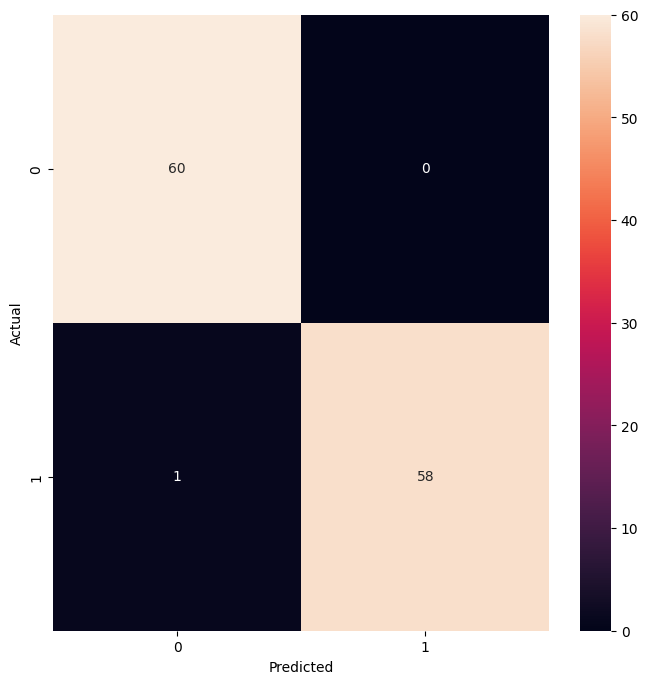

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

param_grid={'C':[0.001,0.01,0.1,1,10,100], 'gamma':[0.001,0.01,0.1,1,10,100]}
rcv=RandomizedSearchCV(SVC(),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_svc=rcv.predict(X_test)
confusion_svc=confusion_matrix(y_test,rcv.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_svc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_svc))
print(f'\nBest Parameters of SVC model is : {rcv.best_params_}\n')

In [ ]:
rcv.predict([[1	,69	,0	,1,	1	,0,	0	,1,	0	,1	,1,	1	,1	,1,	1	]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
lung_cancer_filename = 'lung_cancer_model.sav'
pickle.dump(rcv, open(lung_cancer_filename, 'wb'))

In [ ]:
lung_cancer_loaded_model = pickle.load(open(lung_cancer_filename, 'rb'))
result = lung_cancer_loaded_model.predict([[1	,69	,0	,1,	1	,0,	0	,1,	0	,1	,1,	1	,1	,1,	1	]])
print(result)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


# Asthama Prediction (NOT ACCURATE)

https://www.kaggle.com/datasets/deepayanthakur/asthma-disease-prediction/data

In [ ]:
df = pd.read_csv('/content/asthama_data.csv')
df

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Severity_Mild,Severity_Moderate,Severity_None
0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
1,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
2,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
3,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0
4,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
316796,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
316797,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1
316798,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1


In [ ]:
df['Target'] = df[['Severity_Mild',	'Severity_Moderate',	'Severity_None']].sum(axis=1)

In [ ]:
df

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Severity_Mild,Severity_Moderate,Severity_None,Target
0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0,1
2,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0,1
3,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0,1
4,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
316796,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
316797,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1
316798,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1


In [ ]:
df.drop(['Severity_Mild',	'Severity_Moderate',	'Severity_None'], axis=1, inplace=True)

In [ ]:
df.Target.value_counts()

1    237600
0     79200
Name: Target, dtype: int64

In [ ]:
df.duplicated().sum()

313920

In [ ]:
duplicate = df[df.duplicated()]

print("Duplicate Rows :")

# Print the resultant Dataframe
duplicate

Duplicate Rows :


,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Target
1,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1
2,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1
3,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1
4,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1
5,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
316796,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
316797,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1
316798,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Target
0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1
6,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0
24,1,1,1,1,0,1,1,0,0,1,0,0,0,0,0,1,1
30,1,1,1,1,0,1,1,0,0,1,0,0,0,0,0,1,0
36,1,1,1,1,0,1,0,0,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31638,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
31656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
31662,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
31668,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1


In [ ]:
df.Target.value_counts()

1    1440
0    1440
Name: Target, dtype: int64

In [ ]:
x = df.drop(columns=['Target'])
y  = df['Target']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (2304, 16)
x_test shape:  (576, 16)
y_train shape:  (2304,)
y_test shape:  (576,)


In [ ]:
m = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=100, random_state=10,max_depth=10)
rf.fit(x_train,y_train)
rf_predicted = rf.predict(x_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[ 25 275]
 [243  33]]


Accuracy of Random Forest: 10.069444444444445 

              precision    recall  f1-score   support

           0       0.09      0.08      0.09       300
           1       0.11      0.12      0.11       276

    accuracy                           0.10       576
   macro avg       0.10      0.10      0.10       576
weighted avg       0.10      0.10      0.10       576



In [ ]:
rf.predict(x_test)

In [ ]:
from scipy.stats import randint as sp_randint

param_dist = {"max_depth": [3, 10],
    "max_features": sp_randint(1, 11),
    "min_samples_split": sp_randint(2, 11),
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy"]}
# build a classifier
clf = RandomForestClassifier(n_estimators=50)
# Randomized search
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
    n_iter=50, cv=5)
random_search.fit(x_train,y_train)
print(random_search.best_params_)

{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 1, 'min_samples_split': 7}


              precision    recall  f1-score   support

           0       0.39      0.18      0.25       300
           1       0.44      0.69      0.54       276

    accuracy                           0.43       576
   macro avg       0.42      0.44      0.39       576
weighted avg       0.41      0.43      0.39       576


Best Parameters of  model is : {'bootstrap': False, 'criterion': 'gini', 'max_depth': 3, 'max_features': 2, 'min_samples_split': 10}



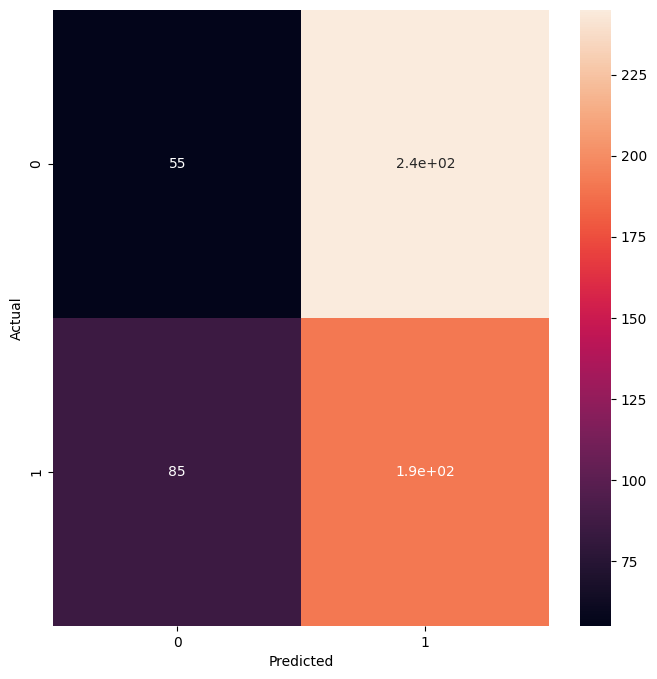

In [ ]:
y_pred_clf=random_search.predict(x_test)
confusion_clf=confusion_matrix(y_test,random_search.predict(x_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_clf,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_clf))
print(f'\nBest Parameters of  model is : {random_search.best_params_}\n')

# Other work

In [ ]:
!python --version


Python 3.10.12


In [ ]:
!pip freeze > requirements.txt